In [56]:
import csv
import os
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix 
from math import sqrt
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

import plotly.plotly as py
import plotly.tools as tls
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/home/deep/Downloads/forestfires.csv')
print(data.shape)
data.head()

(517, 13)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
x_value = data['X'].values
y_value = data['Y'].values
month = data['month'].values
day = data['day'].values
ffmc_value = data['FFMC'].values
dmc_value = data['DMC'].values
dc_value = data['DC'].values
isi_value = data['ISI'].values
temp = data['temp'].values
rh_value = data['RH'].values
wind = data['wind'].values
area = data['area'].values

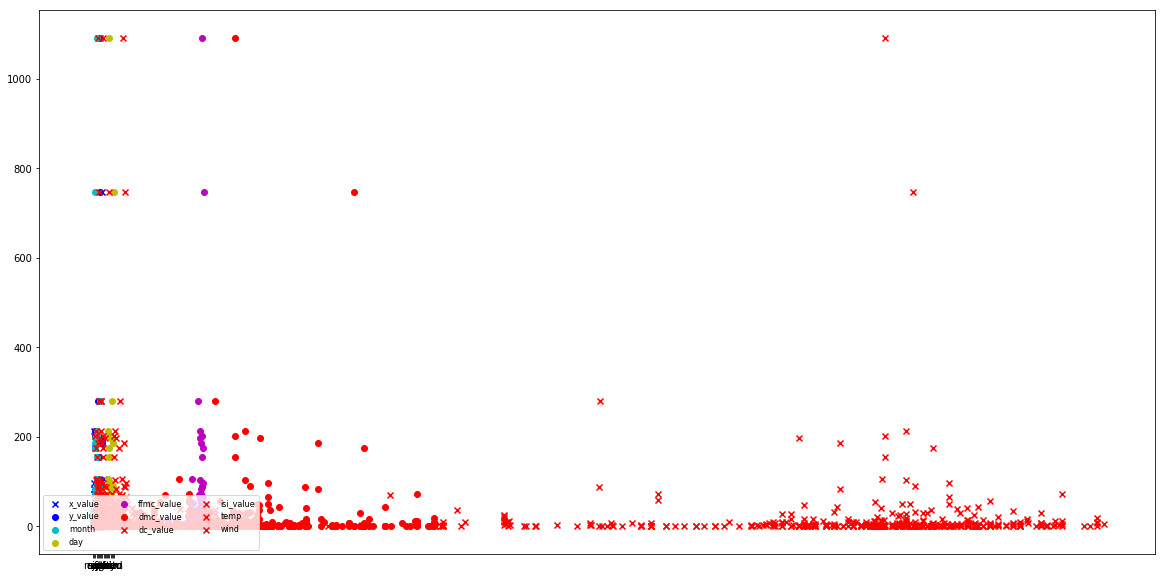

In [7]:
import matplotlib.pyplot as plt
from numpy.random import random

colors = ['b', 'c', 'y', 'm', 'r']

a1 = plt.scatter(x_value, area, marker='x', color=colors[0])
a2 = plt.scatter(y_value, area, marker='o', color=colors[0])
a3  = plt.scatter(month, area, marker='o', color=colors[1])
a4 = plt.scatter(day, area, marker='o', color=colors[2])
a5 = plt.scatter(ffmc_value, area, marker='o', color=colors[3])
a6 = plt.scatter(dmc_value, area, marker='o', color=colors[4])
a7 = plt.scatter(dc_value, area, marker='x', color=colors[4])
a8 = plt.scatter(isi_value, area, marker='x', color=colors[4])
a9 = plt.scatter(temp, area, marker='x', color=colors[4])
a10 = plt.scatter(wind, area, marker='x', color=colors[4])


plt.legend((a1, a2, a3, a4, a5, a6, a7, a8, a9, a10),
           ('x_value', 'y_value', 'month', 'day', 'ffmc_value', 'dmc_value', 'dc_value', 'isi_value', 'temp', 'wind'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.show()

In [8]:
data.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [9]:
obj_df = data.select_dtypes(include=['object']).copy()
obj_df.head()

,month,day
0,mar,fri
1,oct,tue
2,oct,sat
3,mar,fri
4,mar,sun


In [10]:
lb_make = LabelEncoder()
obj_df['month_l'] = lb_make.fit_transform(obj_df['month'])
obj_df['day_l'] = lb_make.fit_transform(obj_df['day'])
obj_df[['month_l','day_l']].head(10)

,month_l,day_l
0,7,0
1,10,5
2,10,2
3,7,0
4,7,3
5,1,3
6,1,1
7,1,1
8,11,5
9,11,2


In [13]:
new_df = pd.DataFrame()
month_onehot = pd.get_dummies(obj_df['month_l'])
day_onehot = pd.get_dummies(obj_df['day_l'])

In [42]:
import traceback
final_df = pd.DataFrame()
for month in month_onehot.columns:
    temp = 'month_' + str(month)
    final_df[temp] = month_onehot[month]
    

In [43]:
for day in day_onehot.columns:
    temp = 'day_' + str(day)
    final_df[temp] = day_onehot[day]

In [47]:
final_df.head()

,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0,0,0,0,0,0,0,1,0,0,...,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,0,0,0,0,0,0,0,0,0,0,...,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,0,0,0,0,0,0,0,0,0,0,...,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,0,0,0,0,0,0,0,1,0,0,...,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,0,0,0,0,0,0,0,1,0,0,...,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [45]:
final_df['X'] = data['X']
final_df['Y'] = data['Y']
final_df['FFMC'] = data['FFMC']
final_df['DMC'] = data['DMC']
final_df['DC'] = data['DC']
final_df['ISI'] = data['ISI']
final_df['temp'] = data['temp']
final_df['RH'] = data['RH']
final_df['wind'] = data['wind']
final_df['rain'] = data['rain']
# final_df['area'] = data['area']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(final_df, data['area'], test_size=0.25)

In [49]:
final_df.describe()

,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,...,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663
std,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,...,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000


In [53]:
X_Train = preprocessing.scale(X_train)
X_Test = preprocessing.scale(X_test)

In [54]:
# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X_Train, y_train)
# Y Prediction
Y_pred = reg.predict(X_Test)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(y_test, Y_pred))
r2 = reg.score(X_Train, y_train)

print(rmse)
print(r2)

52471942694239.96
0.05727300538527924
